In [1]:
import scanpy as sc
import scanpy.external as sce
import anndata as ad
import os
import matplotlib.pyplot as plt
os.chdir("/data")
import rpy2
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython


In [2]:
adata = sc.read_h5ad("h5ad/batch_corrected.h5ad")

In [3]:
adata=adata.raw.to_adata()

In [4]:
adata=adata[adata.obs["annot"]=="Macrophages"]

In [5]:
sc.pp.neighbors(adata, use_rep="X_scVI", n_neighbors=25)
sc.tl.umap(adata, min_dist=0.1)
sc.tl.leiden(adata, flavor="igraph", n_iterations=2, resolution=0.4)

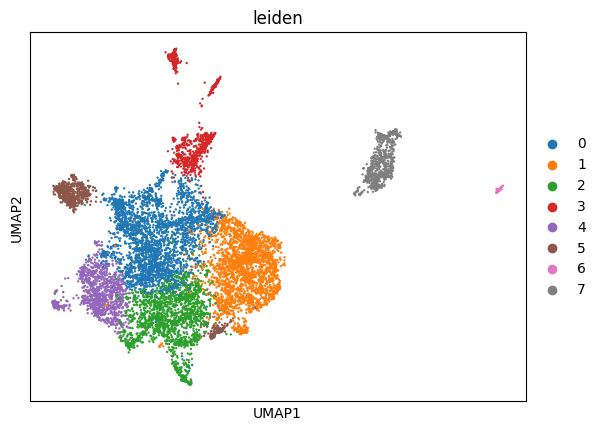

In [6]:
sc.pl.umap(adata, color="leiden")

In [7]:
adata.write_h5ad("h5ad/subtyping/macrophages.h5ad")

In [8]:
%%R
library(Seurat)
adata <- schard::h5ad2seurat('h5ad/subtyping/macrophages.h5ad')
adata <- NormalizeData(adata)
Idents(object=adata) <- 'leiden'
df<-FindAllMarkers(adata, test.use="MAST")
write.csv(df, "csv/subtyping/macrophage_markers.csv")

R[write to console]: Loading required package: SeuratObject

R[write to console]: Loading required package: sp

R[write to console]: 
Attaching package: ‘SeuratObject’


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, t





    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

R[write to console]: Performing log-normalization

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to conso

In [11]:
annot = {"0": "TAM",
         "1": "TAM",
         "2": "TAM",
         "3": "Dendritic Cells",
         "4": "TAM",
         "5": "TAM",
         "6": "Mast Cells",
         "7": "Macrophages"}

In [12]:
adata.obs["annot"]=adata.obs["leiden"].map(annot)

In [13]:
adata.write_h5ad("h5ad/subtyping/macrophages.h5ad")